# Loan Application Status Prediction


## Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

## Importing the required libraries:

In [1279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler,power_transform,MinMaxScaler,PowerTransformer,OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [1280]:
import pandas as pd
pd.set_option('display.max_columns',None)
df = pd.read_csv('Loan_eval.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## EDA (Exploratory Data Analysis)

In [1281]:
df.shape

(614, 13)

We have 614 rows and 13 columns including target variable in this dataset

In [1282]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Loan status is over target column, Rest are independent columns

In [1283]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [1284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1285]:
#lets check for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Descriptive analysis or summary statistics

In [1286]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Removing unnessary columns from dataset based on unique values

In [1287]:
#All the unique values in Loan_ID column columns
len(pd.unique(df['Loan_ID']))

614

In [1288]:
#614 unique values for 614 rows, 
# This column is of no use to predict target variable
#so we can remove this column
df.drop(['Loan_ID'],axis =1,inplace  =True)

## Data Visualization :

### Univariate Analysis :

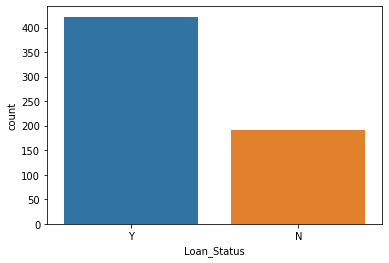

In [1289]:
#lets check our traget variable for class imbalance problem
sns.countplot(x="Loan_Status",data=df)
plt.show()

From the above plot we can see there is a class imbalance problem in this dataset

In [1290]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

There 422 values for 'Y' and 192 for 'N'

## Bivariate Analysis with Target Variable

In [1291]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

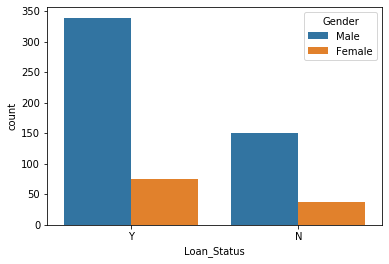

In [1292]:
#Lets check this column againt our target variable
sns.countplot(x="Loan_Status",hue="Gender",data=df)
plt.show()

we can see Male loan status and Female loan status is approved and rejected in same ratio

Number of Males aplicants are more compared to females

In [1293]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

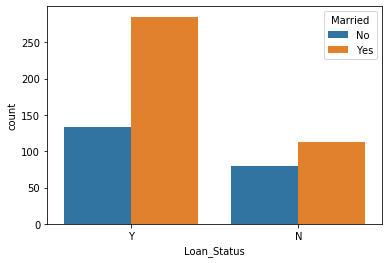

In [1294]:
#Lets check this column againt our target variable
sns.countplot(x="Loan_Status",hue="Married",data=df)
plt.show()

Married people have took more loan compared to single people

In [1295]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

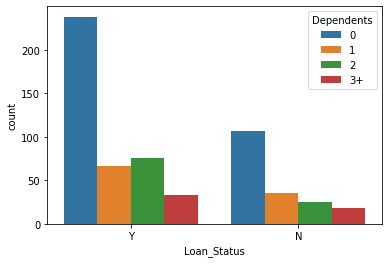

In [1296]:
#Lets check this column againt our target variable
sns.countplot(x="Loan_Status",hue='Dependents',data=df)
plt.show()

People who have zero dependents have appiled more for loan, Only half of them got approved

In [1297]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

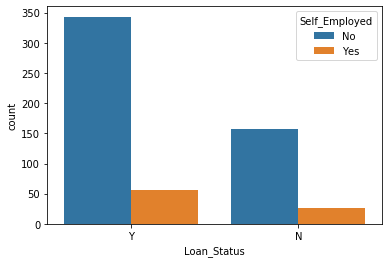

In [1298]:
#Lets check this column againt our target variable
sns.countplot(x="Loan_Status",hue='Self_Employed',data=df)
plt.show()

Most of them who are not self employed have applied for loan, only half of them got approved

In [1299]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

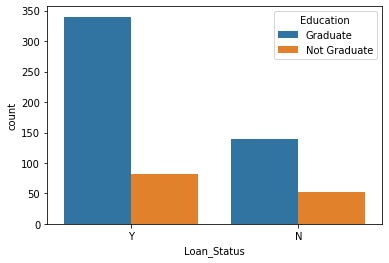

In [1300]:
#Lets check this column againt our target variable
sns.countplot(x="Loan_Status",hue='Education',data=df)
plt.show()

We can see that Loan is approved if a person is Graduates 

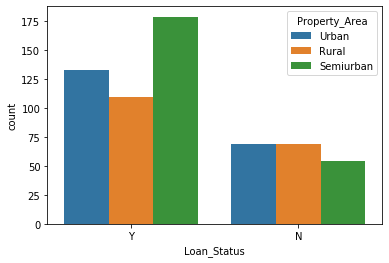

In [1301]:
#Lets check this column againt our target variable
sns.countplot(x="Loan_Status",hue='Property_Area',data=df)
plt.show()

Semiurban people got most of the loan approved

In [1302]:
#since we have 614 column, lets find value of loan amount which is a there a 300 range
df.shape

(614, 12)

In [1303]:
#305 people among 614 people have applied for loan have income less than 3800 rupees
len(df.loc[df.ApplicantIncome <= 3800])

306

In [1304]:
#308 people among 614 people have applied for loan have income more than 3800 rupees
len(df.loc[df.ApplicantIncome > 3800])

308

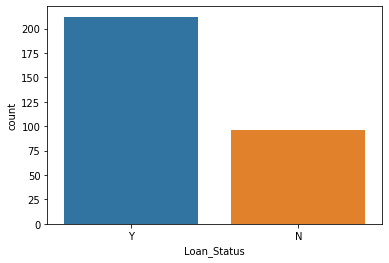

In [1305]:
#we can see that probabality of loan approval is higher than income is grether than 3800 rupees
sns.countplot(x="Loan_Status",data=df.loc[df["ApplicantIncome"] > 3800])
plt.show()

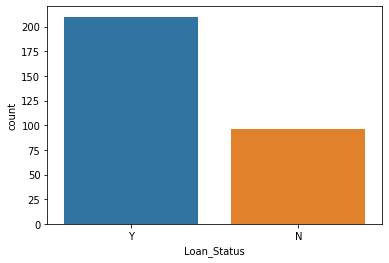

In [1306]:
#we can see that probabality of loan approval is lower than income is less than 3800 rupees
sns.countplot(x="Loan_Status",data=df.loc[df["ApplicantIncome"] <= 3800])
plt.show()

In [1307]:
#lets check Loan amount column with our target variable

In [1308]:
#Among 614 people , 311 peple took loan more than 125 rupees
len(df.loc[df['LoanAmount'] >= 125])

311

In [1309]:
#Among 614 people , 281 peple took loan less than 125 rupees
len(df.loc[df['LoanAmount'] < 125])

281

In [1310]:
#max
df.LoanAmount.max()

700.0

In [1311]:
#min
df.LoanAmount.min()

9.0

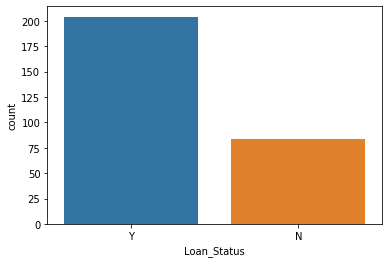

In [1312]:
#If loan amount is less than 125 rupees, the probalility of approval of loan is high
sns.countplot(x="Loan_Status",data=df.loc[df["LoanAmount"] <= 125])
plt.show()

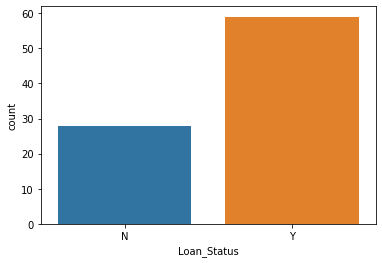

In [1313]:
#We can see that probabality of loan approval high when loan amount is less than 125 rupees
#and Applicant income is more than 3800 rupees
sns.countplot(x="Loan_Status",data=df.loc[(df["LoanAmount"] < 125) & (df["ApplicantIncome"] > 3800)])
plt.show()

In [1314]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

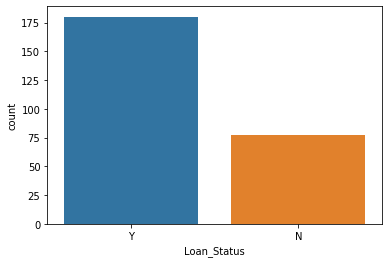

In [1315]:
#We can see that probabality of loan approval high when Apllicatant income is more than 3800 rupees
#and Applicant Education is Graduate
sns.countplot(x="Loan_Status",data=df.loc[(df["ApplicantIncome"]>3800)&(df['Education']== 'Graduate')])
plt.show()

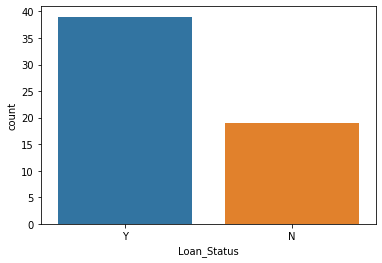

In [1316]:
#We can see that probabality of loan approval high when Apllicatant income is more than 3800 rupees
#and Applicant is self employed
sns.countplot(x="Loan_Status",data=df.loc[(df["ApplicantIncome"]>3800)&(df['Self_Employed']== 'Yes')])
plt.show()

In [1317]:
#max
df.Loan_Amount_Term.max()

480.0

In [1318]:
#min
df.Loan_Amount_Term.min()

12.0

In [1319]:
#we have 512 applicants 614 whose loan Amount term is 360
len(df.loc[df['Loan_Amount_Term'] == 360])

512

In [1320]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1321]:
#Lets check applicatants income based on there Dependents
df.groupby('Dependents')['ApplicantIncome'].mean()

Dependents
0     4917.423188
1     5962.274510
2     4926.782178
3+    8581.215686
Name: ApplicantIncome, dtype: float64

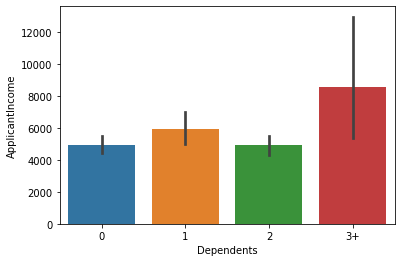

In [1322]:
#We can see that if dependents of applicatant are more,Than the income is also more
sns.barplot(y="ApplicantIncome",x="Dependents",data=df)
plt.show()

In [1323]:
#Lets check the Loan amount based on loan amount term
df.groupby('Loan_Amount_Term')['LoanAmount'].mean()

Loan_Amount_Term
12.0     111.000000
36.0     117.500000
60.0     140.000000
84.0     132.250000
120.0     22.333333
180.0    147.523810
240.0    118.333333
300.0    185.153846
360.0    147.245436
480.0    151.800000
Name: LoanAmount, dtype: float64

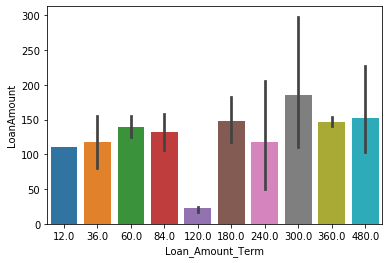

In [1324]:
#Lets check the Loan amount based on loan amount term
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)
plt.show()

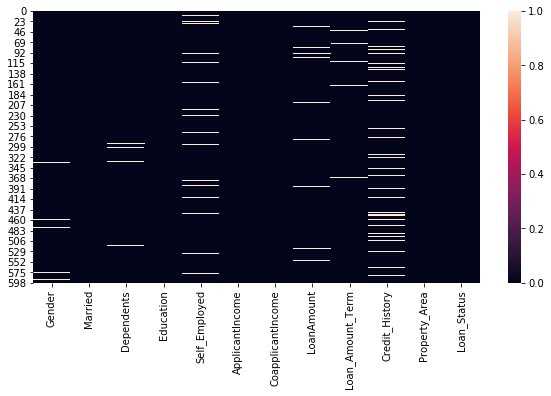

In [1325]:
#checking the missing values with visualization technique
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

We can see there are lot of null values in some columns

## Data Preprocessing :

### Handling Null Values

In [1326]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are 614 rows in this dataset, max Null values is 50 in Credit_History column

### 1.Gender column

In [1327]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [1328]:
#Lets check if the what is mode of this column when Loan status is Yes
df.loc[df['Loan_Status'] == "Y",'Gender'].mode()

0    Male
dtype: object

In [1329]:
#Lets check if the what is mode of this column when Loan status is No
x = df.loc[df['Loan_Status'] == "N",'Gender'].mode()
mode= x[0]
mode

'Male'

In [1330]:
#since both are male we can replace missing values with male
df['Gender'].fillna(mode,inplace= True)

In [1331]:
#now gender column ahs no null values
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 2.Married column

In [1332]:
#since there are only 3 missing values we can replace it mode
mode_m = df['Married'].mode()
mode_mr = mode_m[0]
mode_mr

'Yes'

In [1333]:
df['Married'].fillna(mode_mr,inplace= True)

In [1334]:
#now married column has no null values
df.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 3.Dependents

In [1335]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [1336]:
#Lets check if the what is mode of this column when Loan status is Yes
df.loc[df['Loan_Status'] == "Y",'Dependents'].mode()

0    0
dtype: object

In [1337]:
#Lets check if the what is mode of this column when Loan status is No
df.loc[df['Loan_Status'] == "N",'Dependents'].mode()

0    0
dtype: object

In [1338]:
#since both are 0 we can replace missing values with male
df['Dependents'].fillna( '0' ,inplace= True)

In [1339]:
#now Dependents column has no null values
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 4.Self Employed

In [1340]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [1341]:
#Lets check if the what is mode of this column when Loan status is Yes
df.loc[df['Loan_Status'] == "Y",'Self_Employed'].mode()

0    No
dtype: object

In [1342]:
#Lets check if the what is mode of this column when Loan status is No
df.loc[df['Loan_Status'] == "N",'Self_Employed'].mode()

0    No
dtype: object

In [1343]:
#since both are 0 we can replace missing values with male
df['Self_Employed'].fillna( 'No' ,inplace= True)

In [1344]:
#now self_employed column has no null values
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### LoanAmount    

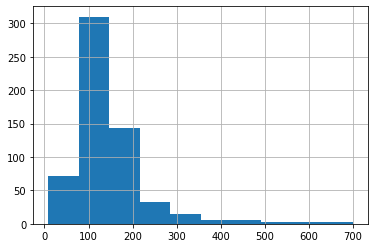

In [1345]:
#Lets check the distribution
df['LoanAmount'].hist()
plt.show()

In [1346]:
#data is right skewed, hence lets replace missing values with median
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace= True)

### Loan_Amount_Term 

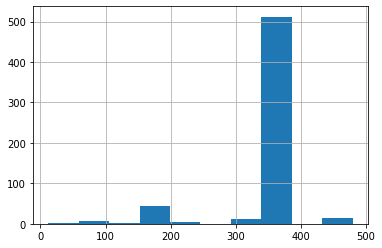

In [1347]:
#Lets check the distribution
df.Loan_Amount_Term.hist()
plt.show()

In [1348]:
#data is left skewed, hence lets replace missing values with median
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace= True)

In [1349]:
df.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [1350]:
#We can see that 526 among 614 rows in this column is 360
#so lets make all 360 value as 1 
#and other as 0
df.loc[df['Loan_Amount_Term'] == 360, ['Loan_Amount_Term']] = 1

In [1351]:
df.loc[df['Loan_Amount_Term'] != 1, ['Loan_Amount_Term']]  = 0

In [1352]:
df.Loan_Amount_Term.value_counts()

1.0    526
0.0     88
Name: Loan_Amount_Term, dtype: int64

### Credit_History

In [1353]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [1354]:
#since it it is a nominal column, lets replace it with mode
m = df.Credit_History.mode()
mode_c  =m[0]
mode_c

1.0

In [1355]:
df['Credit_History'].fillna( mode_c ,inplace= True)

In [1356]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

now there are no null values in this dataset

## Label Encoding

In [1357]:
#lets use Label encoding for our atrget variable
encoding = LabelEncoder()
df['Loan_Status'] = encoding.fit_transform(df['Loan_Status'].values.reshape(-1,1))

In [1358]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [1359]:
#lets use ordinal encoding for other variables
collist = df.columns
o_encoding = OrdinalEncoder()

#lets exclude our last column Temp which is created check Train and test
for i in collist:
    if df[i].dtypes == 'object':
        df[i] = o_encoding.fit_transform(df[i].values.reshape(-1,1))

In [1360]:
#lets check it out
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,1.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,1.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,1.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,1.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,1.0,1.0,2.0,1


In [1361]:
#now our data is either int or float

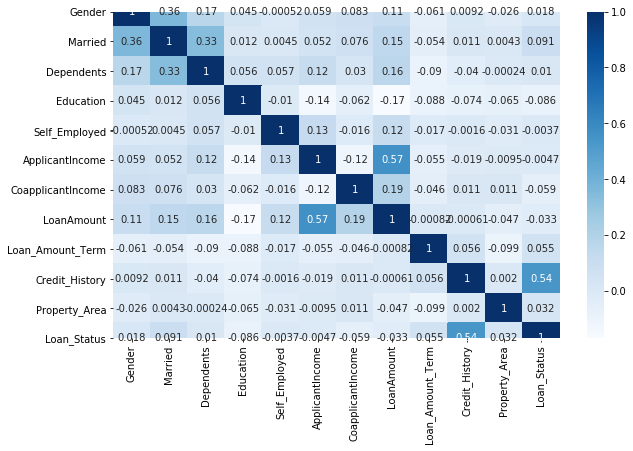

In [1362]:
#correlation
fig = plt.figure(figsize=(10,6))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

In [1363]:
#lets check for the correlation of input columns with Target Variable
cor_matrix['Loan_Status'].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Loan_Amount_Term     0.054963
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

### Outliers Removal

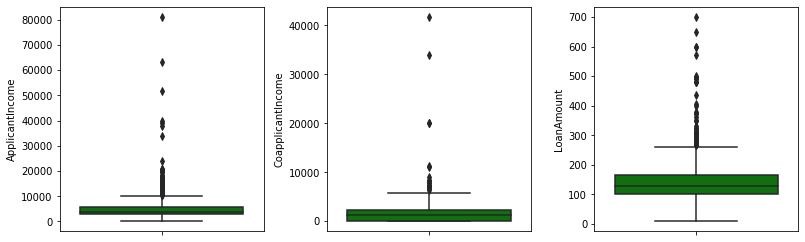

In [1364]:
# lets check for outliers among all the columns Numerical columns
Numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
collist = Numerical_columns
ncol = 4
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

We can see multiple outliers in all the three columns

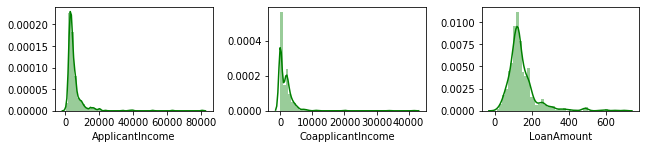

In [1365]:
# Lets check the distribution
Numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
collist = Numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

Data is very much right skewed for thses three columns

In [1366]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [1367]:
##Function of outlier Removal when data looks like normal distributed.
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [1368]:
#Lets remove Outliers using IQR3 methods since the data is not normally ditributed
Numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for i in Numerical_columns:
    outliers_IQR3(df,i)

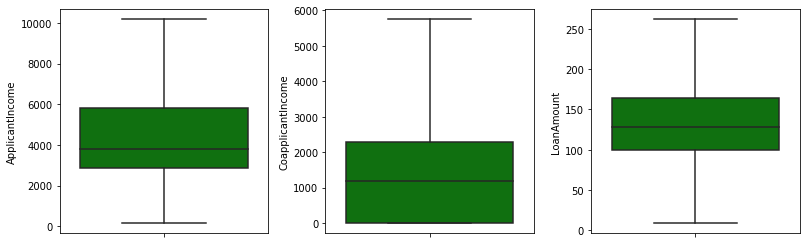

In [1369]:
# lets check for outliers among all the columns Numerical columns
Numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
collist = Numerical_columns
ncol = 4
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

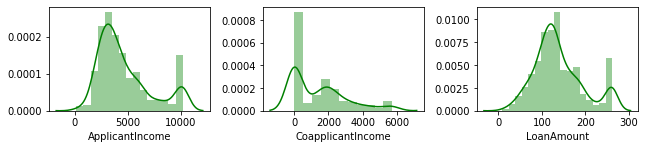

In [1370]:
# Lets check the distribution
Numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
collist = Numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

In [1371]:
#data is almost normal distributed for all the three columns

## Skewness Reduction

In [1372]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1373]:
#skewness Reduction
#lets devide X and Y before handing skewness
Y = df['Loan_Status']
X = df.drop('Loan_Status',axis = 1)

In [1374]:
#Lets check for skesness amonga ll the column
X.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      1.039846
CoapplicantIncome    1.012763
LoanAmount           0.683693
Loan_Amount_Term    -2.040812
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

In [1375]:
#EVen though there is skewness is some columns, we only consider numerical columns
#Reducing the skewness using power transform method for all the columns whose skewness is out of range -0.5 to +0.5
collist = Numerical_columns
for i in range(len(collist)):
    if X[collist[i]].skew() > 0.5:
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr 
    elif X[collist[i]].skew() < -0.5 :
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr    
    else:
        pass
X.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.035649
CoapplicantIncome   -0.164920
LoanAmount           0.026239
Loan_Amount_Term    -2.040812
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

Skewness has been reduced for all the Numerical columns

## Handling class Imbalance problem using SMOT method

In [1376]:
#To install imbalanced-learn library use "pip install imbalanced-learn" command
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X, Y)

y_sm.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [1377]:
#now our class imbalnace problem is sloved

## Lets Check for Best Random State 

In [1378]:
maxaccu = 0
rand_state = 0
for i in range(42,100):

    x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.22,random_state= i,stratify= y_sm )
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        rand_state = i
print('Best accuracy is {} on random state {}'.format(maxaccu,rand_state))

Best accuracy is 0.7688172043010753 on random state 46


In [1379]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 46


In [1380]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.22,random_state= rand_state )

In [1381]:
#now we don't have the class imbalance problem
y_train.value_counts()

1    341
0    317
Name: Loan_Status, dtype: int64

## Model selection:

In [1382]:
#lets Choose Among this Models
lg = LogisticRegression()
dtc = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=3)
#ensemble technique
rf = RandomForestClassifier()

In [1383]:
model_list = [lg,dtc,knn,svc,rf]
least_diffrence = []
for m in model_list:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('The accuracy of {} is {}'.format(m,accu))
    cv = cross_val_score(m,x_sm,y_sm,cv =5)
    print("cross val score :",  cv.mean())
    diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
    least_diffrence.append((m,diffrence))
    print('diffrence b/w accurancy score and cross val score is :',diffrence)
    for i in ([0,1]):
        f1 = f1_score(y_test,pred,pos_label=i)
        print("f1 score for {} is {} ".format(i,f1))



LogisticRegression()
[[52 53]
 [ 1 80]]
              precision    recall  f1-score   support

           0       0.98      0.50      0.66       105
           1       0.60      0.99      0.75        81

    accuracy                           0.71       186
   macro avg       0.79      0.74      0.70       186
weighted avg       0.82      0.71      0.70       186

The accuracy of LogisticRegression() is 0.7096774193548387
cross val score : 0.7192166807551422
diffrence b/w accurancy score and cross val score is : 0.009539261400303478
f1 score for 0 is 0.6582278481012659 
f1 score for 1 is 0.7476635514018691 


DecisionTreeClassifier()
[[76 29]
 [13 68]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       105
           1       0.70      0.84      0.76        81

    accuracy                           0.77       186
   macro avg       0.78      0.78      0.77       186
weighted avg       0.79      0.77      0.78       186

The accura

In [1384]:
least_diffrence

[(LogisticRegression(), 0.009539261400303478),
 (DecisionTreeClassifier(), 0.00789999909106609),
 (KNeighborsClassifier(n_neighbors=3), 0.016618720402839515),
 (SVC(), 0.007105818085966997),
 (RandomForestClassifier(), 0.007563239076886608)]

### Voting Classifer:

In [1385]:
#these are best three models
estimator = []
estimator.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
estimator.append(('SVC',SVC(probability= True,gamma= 'auto')))
estimator.append(('RFC',RandomForestClassifier()))

In [1386]:
#voting classifier with soft voting
vot_soft = VotingClassifier(estimators=estimator,voting = 'soft')
vot_soft.fit(x_train,y_train)
y_pred  = vot_soft.predict(x_test)

#usimg accuracy score
print("Accuracy score of voting classifer is :",accuracy_score(y_test,y_pred))

Accuracy score of voting classifer is : 0.8279569892473119


In [1387]:
#lets check the cross val score of voting classifer
cv_voting = cross_val_score(vot_soft,x_sm,y_sm,cv=5)
print("Cross val score for voting classifer is :",cv_voting.mean())

Cross val score for voting classifer is : 0.800993237531699


In [1388]:
#Random forest is having least diffrence betwwen accurancy score and cross val score
#so lets choose random forest as out final model

## Hyperparameter Tuning:

lets create the parameter list to pass in GridsearchCv

In [1389]:
parameters = {'criterion' : ['gini','entropy'] ,'max_depth' : [3,4,5,6,7,8,10,25]
             ,'min_samples_split':[2,5,8,10,12,18],'max_features':['auto','sqrt'],'min_samples_leaf':[1,3,5,7,9]}

In [1390]:
gsv = RandomizedSearchCV(estimator= rf , param_distributions=parameters,cv =5)
gsv.fit(x_train,y_train) 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18]})

In [1391]:
gsv.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'gini'}

we got the best parameters using Randomized search cv  {'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'gini'}

## Creating a Final Model as Random Forest Classifier

In [1392]:
final_model = RandomForestClassifier(criterion='gini',max_depth=10,max_features='auto',min_samples_leaf=1,min_samples_split=2)
#final_model =RandomForestClassifier()
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
accu =accuracy_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy of {} is {}'.format(final_model,accu))
cv = cross_val_score(final_model,x_sm,y_sm,cv =5)
print('\n')
print("cross val score :",  cv.mean())
diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
least_diffrence.append((final_model,diffrence))
print('\n')
print('diffrence b/w accurancy score and cross val score is :',diffrence)
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))

[[73 32]
 [ 4 77]]
              precision    recall  f1-score   support

           0       0.95      0.70      0.80       105
           1       0.71      0.95      0.81        81

    accuracy                           0.81       186
   macro avg       0.83      0.82      0.81       186
weighted avg       0.84      0.81      0.81       186

The accuracy of RandomForestClassifier(max_depth=10) is 0.8064516129032258


cross val score : 0.8200267681036912


diffrence b/w accurancy score and cross val score is : 0.013575155200465483
f1 score for 0 is 0.8021978021978022 
f1 score for 1 is 0.8105263157894737 


In [1393]:
#diffrence between cross val score and accuracy is only 0.018
#F1 is score 84% and 84% for both 0 and 1 after handling class imbalnce problem

## Saving the model:

In [1394]:
#serialization using joblib
import joblib
joblib.dump(final_model,'Loan_Status.obj')

['Loan_Status.obj']

In [1395]:
Loan_Status = joblib.load('Loan_Status.obj')

In [1396]:
accuracy_score(Loan_Status.predict(x_test),y_test)

0.8064516129032258

## AUC ROC curve :

Since we have Random forest classifer as our final , lets check out the auc roc curve and score

In [1397]:
final_model.score(x_train,y_train)

0.9756838905775076

In [1398]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]

In [1399]:
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob)

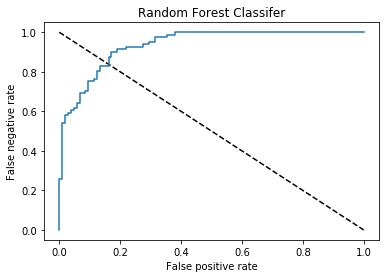

In [1400]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Random Forest Classifer')
plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.title('Random Forest Classifer')
plt.show()

In [1401]:
roc_auc_score(pred,y_test)

0.8272369832002859

## Conclusion

In [1402]:
conclusion = pd.DataFrame((Loan_Status.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185
Predicted,1,0,1,1,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,1,1,0,1,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,1
Actual,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,1,0,0,1,0,1,1,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1


84 % of the answer are correct, Model is also not overfitted as we checked with cross val scoce